In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [166]:
df = pd.read_csv("cancer_classification.csv")

In [167]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [168]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [170]:
df.duplicated().sum()

0

In [171]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [172]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [173]:
df["benign_0__mal_1"].value_counts() # somehow balanced

benign_0__mal_1
1    357
0    212
Name: count, dtype: int64

In [174]:
ben = df[df["benign_0__mal_1"]==0]
mal = df[df["benign_0__mal_1"]==1]

<Axes: xlabel='benign_0__mal_1', ylabel='mean area'>

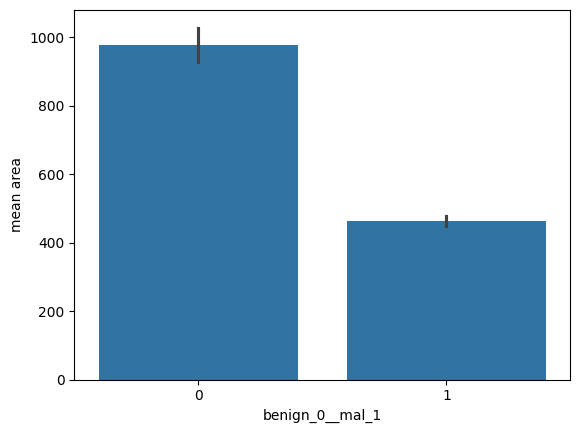

In [175]:
sns.barplot(x="benign_0__mal_1", y="mean area", data=df)

<Axes: xlabel='mean perimeter', ylabel='Count'>

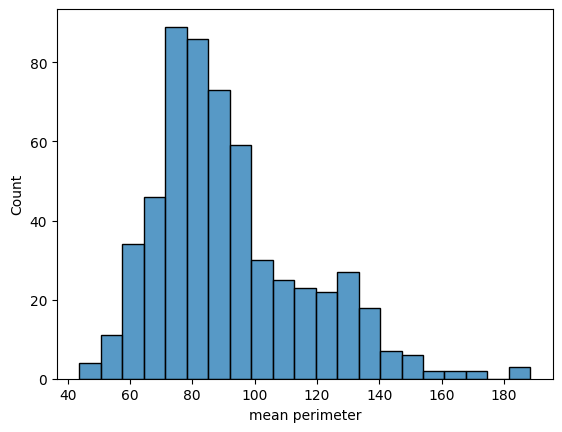

In [176]:
sns.histplot(df["mean perimeter"])

In [177]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

<Axes: xlabel='mean area'>

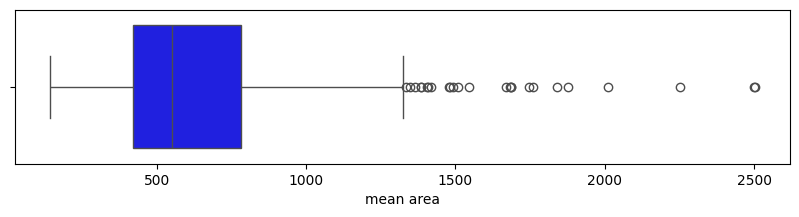

In [178]:
plt.figure(figsize=(10,2))
sns.boxplot(x="mean area", data=df,color='blue')

In [179]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [180]:
df.groupby(["benign_0__mal_1"])["mean radius"].agg(["mean"])

,mean
benign_0__mal_1,
0,17.462830
1,12.146524


# random sampling

In [181]:
sam_ben = ben.sample(n=50, replace=True)
sam_mal = mal.sample(n=50, replace=True)

# confidence interval

In [182]:
sample_mean = sam_ben["mean radius"].mean()
sample_std = sam_ben["mean radius"].std()
sample_stderr = sample_std/np.sqrt(sam_ben["mean radius"].shape[0])
sp.stats.norm.interval(0.95,sample_mean, sample_stderr)

(16.416213132920983, 17.98738686707902)

# A/B testing

is there any statistical difference between "smoothness error" for ben and mal type?

$H_0$ = mean of smoothness error is same for both class

$H_a$ = there is a statistical difference

In [183]:
sp.stats.ttest_ind(a=sam_ben["smoothness error"], b=sam_mal["smoothness error"], equal_var=False)

TtestResult(statistic=-1.0581075904298896, pvalue=0.2927734210837217, df=92.1105020457964)

#### Inference: there is no statistical difference in smoothness error for both the classes

# clustering

In [184]:
X_cluster = df.copy()
X_cluster = X_cluster.drop(columns=["benign_0__mal_1"], axis = 1)

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [186]:
X_cluster = StandardScaler().fit_transform(X_cluster)

In [187]:
inertia_list, sil_list = [], []

n = [2,3,4,5,6,7,8]

for cluster in n:
    kmeans_instance = KMeans(n_clusters=cluster).fit(X_cluster)
    inertia_list.append(kmeans_instance.inertia_)
    sil_list.append(silhouette_score(X_cluster, kmeans_instance.labels_))

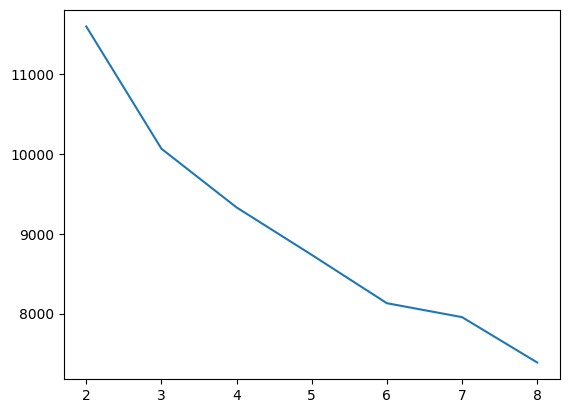

In [188]:
plt.plot(n, inertia_list)

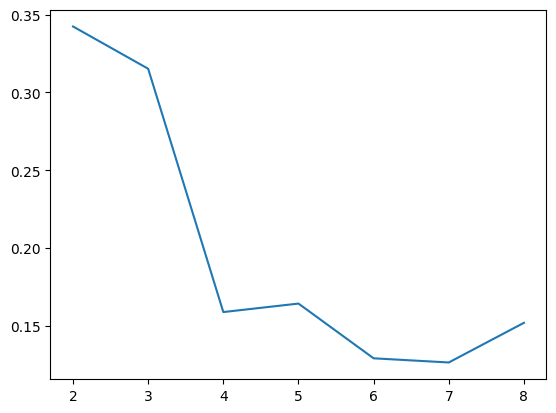

In [189]:
plt.plot(n, sil_list)

In [190]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Logistic regression

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [192]:
y = df["benign_0__mal_1"]
X = df.copy()
X = X.drop(columns=["benign_0__mal_1"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [195]:
clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [198]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        69

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [202]:
print("accuracy: " + str(accuracy_score(y_test, y_pred)))
print("precision: " + str(precision_score(y_test, y_pred)))
print("recall: " + str(recall_score(y_test, y_pred)))
print("f1: " + str(f1_score(y_test, y_pred)))

accuracy: 0.9736842105263158
precision: 0.9583333333333334
recall: 1.0
f1: 0.9787234042553191


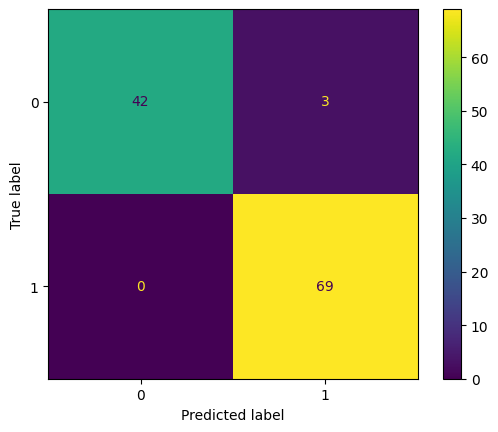

In [203]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

# Gaussian Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB

In [205]:
y = df["benign_0__mal_1"]
X = df.copy()
X = X.drop(columns=["benign_0__mal_1"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [206]:
gnb = GaussianNB().fit(X_train, y_train)

In [209]:
y_pred = gnb.predict(X_test)

In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        47
           1       0.90      0.97      0.94        67

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [211]:
print("accuracy: " + str(accuracy_score(y_test, y_pred)))
print("precision: " + str(precision_score(y_test, y_pred)))
print("recall: " + str(recall_score(y_test, y_pred)))
print("f1: " + str(f1_score(y_test, y_pred)))

accuracy: 0.9210526315789473
precision: 0.9027777777777778
recall: 0.9701492537313433
f1: 0.935251798561151


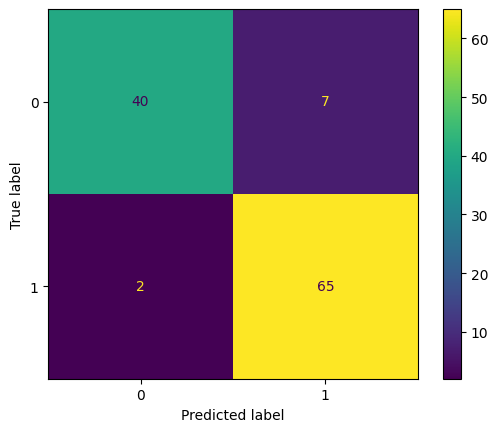

In [212]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

# Decision tree

In [213]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [214]:
y = df["benign_0__mal_1"]
X = df.copy()
X = X.drop(columns=["benign_0__mal_1"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [215]:
%%time

dt = DecisionTreeClassifier()

tree_params = {
    'max_depth' : [2,3,4,5,7],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split' : [2,3,4,5]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision', 
    'recall' : 'recall',
    'f1' : 'f1'
}

cv_instance = GridSearchCV(dt, tree_params, scoring=scoring, cv = 5, refit='f1').fit(X_train, y_train)

CPU times: total: 4.23 s
Wall time: 4.3 s


In [216]:
cv_instance.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [217]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2).fit(X_train, y_train)

In [218]:
y_pred = dt.predict(X_test)

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [220]:
print("accuracy: " + str(accuracy_score(y_test, y_pred)))
print("precision: " + str(precision_score(y_test, y_pred)))
print("recall: " + str(recall_score(y_test, y_pred)))
print("f1: " + str(f1_score(y_test, y_pred)))

accuracy: 0.9210526315789473
precision: 0.9295774647887324
recall: 0.9428571428571428
f1: 0.9361702127659575


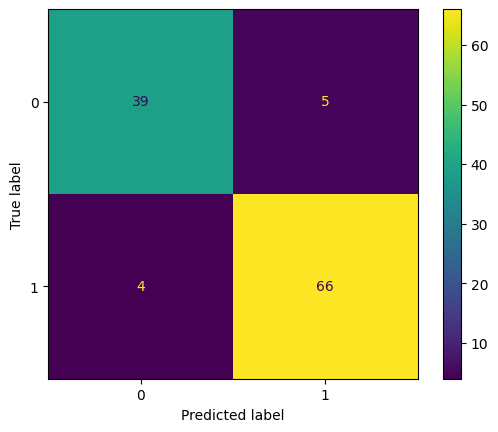

In [221]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

# Random forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
%%time

rf = RandomForestClassifier()
rf_params = {
    'max_depth' : [2,3,4,5,7],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split' : [2,3,4,5],
    'n_estimators' : [10,20, 30, 40],
    'max_features' : [0.5, 0.2, 0.3, 0.1]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision', 
    'recall' : 'recall',
    'f1' : 'f1'
}

cv_instance = GridSearchCV(rf, rf_params, scoring=scoring, cv = 5, refit='f1').fit(X_train, y_train)

CPU times: total: 4min 49s
Wall time: 4min 59s


In [227]:
import pickle

In [228]:
with open("rf_model.pkl", 'wb') as file:
    pickle.dump(cv_instance, file)

In [229]:
with open("rf_model.pkl", 'rb') as file:
    cv_instance = pickle.load(file)

In [230]:
cv_instance.best_params_

{'max_depth': 7,
 'max_features': 0.2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 30}

In [231]:
rf = RandomForestClassifier(max_depth=7, max_features=0.2, min_samples_leaf=1, min_samples_split=3, n_estimators=30).fit(X_train, y_train)

In [232]:
y_pred = rf.predict(X_test)

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.92      0.96      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [234]:
print("accuracy: " + str(accuracy_score(y_test, y_pred)))
print("precision: " + str(precision_score(y_test, y_pred)))
print("recall: " + str(recall_score(y_test, y_pred)))
print("f1: " + str(f1_score(y_test, y_pred)))

accuracy: 0.9210526315789473
precision: 0.9178082191780822
recall: 0.9571428571428572
f1: 0.9370629370629371


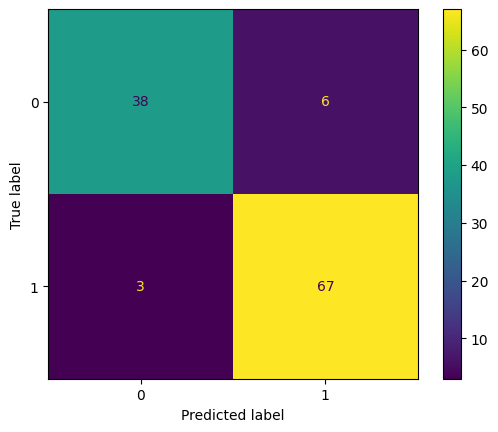

In [235]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

# XGBoost

In [236]:
from xgboost import XGBClassifier

In [237]:
%%time

xgb = XGBClassifier()
xgb_params = {
    'max_depth' : [2,3,4,5,7],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split' : [2,3,4,5],
    'n_estimators' : [10,20, 30, 40],
    'max_features' : [0.5, 0.2, 0.3, 0.1],
    'learning_rate' : [0.01,0.1,0.2]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision', 
    'recall' : 'recall',
    'f1' : 'f1'
}

cv_instance = GridSearchCV(xgb, xgb_params, scoring=scoring, cv = 5, refit='f1').fit(X_train, y_train)

CPU times: total: 26min 24s
Wall time: 14min 33s


In [238]:
y_pred = cv_instance.best_estimator_.predict(X_test)

In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.92      0.97      0.94        70

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [240]:
print("accuracy: " + str(accuracy_score(y_test, y_pred)))
print("precision: " + str(precision_score(y_test, y_pred)))
print("recall: " + str(recall_score(y_test, y_pred)))
print("f1: " + str(f1_score(y_test, y_pred)))

accuracy: 0.9298245614035088
precision: 0.918918918918919
recall: 0.9714285714285714
f1: 0.9444444444444444


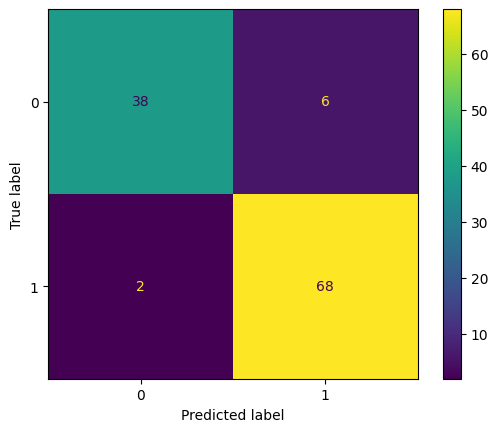

In [241]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()